The project proposal for credit card approval is crucial in today's world as it enables banks to harness the power of data and analytics to make more accurate and efficient credit decisions. By predicting good clients, banks can manage risks effectively, offer better customer experiences, and gain a competitive edge in the dynamic financial industry.

Implementing a credit card approval model based on predictive analytics will have significant impacts on the banking sector. It will streamline and expedite the credit evaluation process, leading to faster approvals and improved customer experience. Additionally, the model's ability to identify creditworthy clients accurately will enhance risk management, reduce default rates, and strengthen the overall financial health of banks' credit card portfolios.

The proposed method can be helpful for banks in India by addressing the gap in their credit assessment process. Traditional credit scoring models may not fully capture the complexity of an applicant's creditworthiness. By leveraging advanced machine learning techniques and incorporating a wide range of applicant features, the proposed method can provide a more comprehensive and accurate credit risk assessment, potentially reducing the risk of defaults and enhancing the bank's ability to make informed lending decisions.

## **Import the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## **Read the data**

In [2]:
application_data = pd.read_csv('/content/Credit_card.csv')
credit_card_label = pd.read_csv('/content/Credit_card_label.csv')

In [3]:
# Merge datasets based on the 'Ind_ID' key
df = pd.merge(application_data, credit_card_label, on='Ind_ID', how='inner')

### **Basic data exploration**

In [4]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [7]:
df.shape

(1548, 19)

Dropping the duplicate rows if any.

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(1548, 19)

## **Dealing with missing vaues**

In [10]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [11]:
#Imputing missing gender values with mode
mode_gender = df['GENDER'].mode().iloc[0]
df['GENDER'].fillna(mode_gender, inplace=True)

In [12]:
#Imputing missing values in Annual income with mean
mean_income = df['Annual_income'].mean()
df['Annual_income'].fillna(mean_income, inplace=True)

In [13]:
# Impute missing values in 'Birthday_count' column with the mean
mean_birthday_count = df['Birthday_count'].mean()
df['Birthday_count'].fillna(mean_birthday_count, inplace=True)

In [14]:
# Drop the 'Type_Occupation' column from the DataFrame as there are many missing values in this this column
df = df.drop('Type_Occupation', axis=1)

In [15]:
df.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [16]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1


## **Dealing with Outliers**

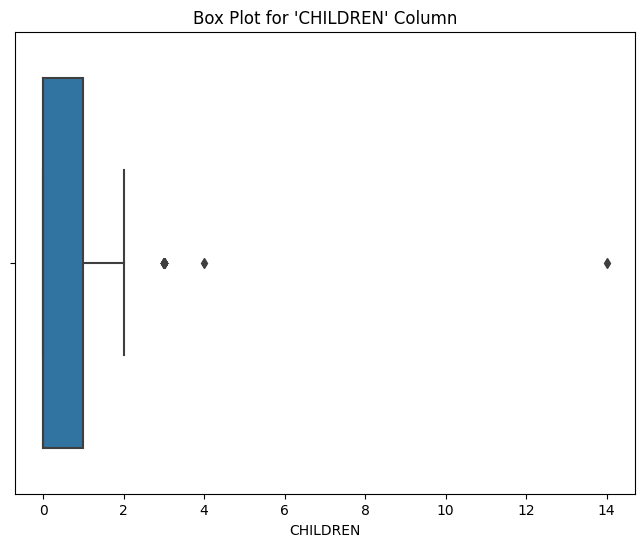

In [17]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CHILDREN'])
plt.title("Box Plot for 'CHILDREN' Column")
plt.xlabel("CHILDREN")
plt.show()


In [18]:
# Considered count of children less than '0' and greater than '5' as outliers
outliers = df[(df['CHILDREN'] < 0) | (df['CHILDREN'] > 5)]


mean_children = df['CHILDREN'].mean()

# Imputed the outliers with the mean value
df.loc[df['CHILDREN'] < 0, 'CHILDREN'] = mean_children
df.loc[df['CHILDREN'] > 5, 'CHILDREN'] = mean_children


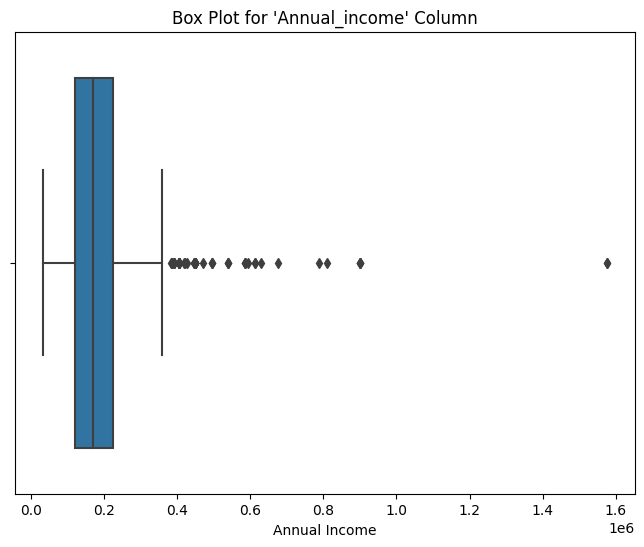

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Annual_income'])
plt.title("Box Plot for 'Annual_income' Column")
plt.xlabel("Annual Income")
plt.show()

In [20]:
#Found out the outliers based on IQR and imputed them with mean
# Calculated the first quartile (Q1) and third quartile (Q3)
Q1 = df['Annual_income'].quantile(0.25)
Q3 = df['Annual_income'].quantile(0.75)

# Calculated the Interquartile Range (IQR)
IQR = Q3 - Q1

#  Calculated the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputed the outliers found out based on IQR with the mean value
mean_income = df['Annual_income'].mean()
df.loc[(df['Annual_income'] < lower_bound) | (df['Annual_income'] > upper_bound), 'Annual_income'] = mean_income


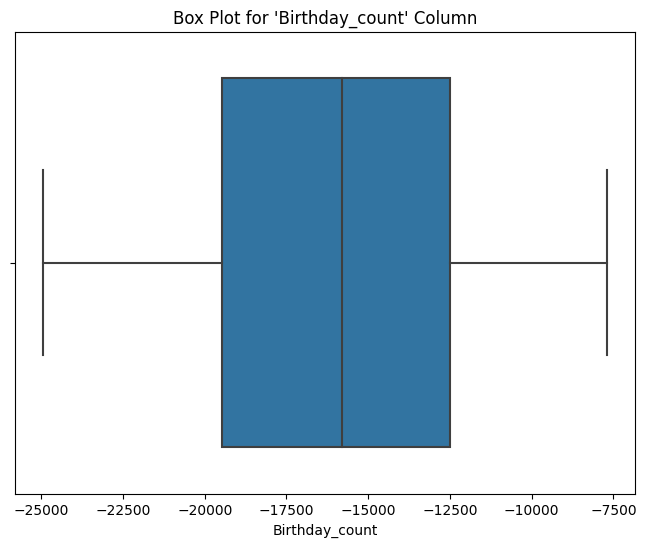

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Birthday_count'])
plt.title("Box Plot for 'Birthday_count' Column")
plt.xlabel("Birthday_count")
plt.show()

As per box plot above there are no outliers in Birthday_count column

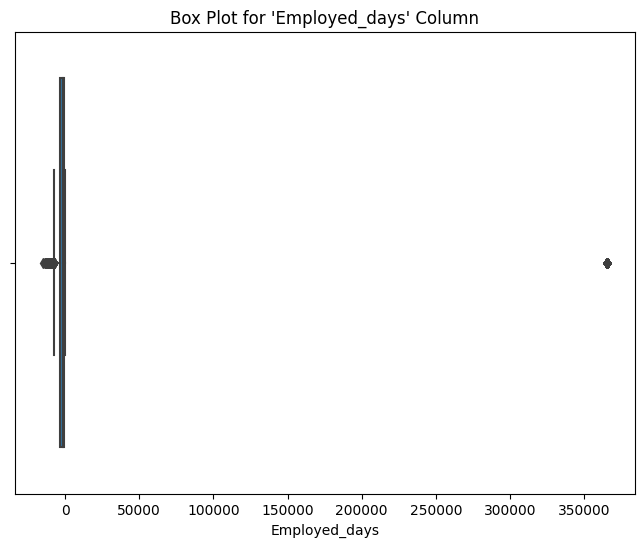

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Employed_days'])
plt.title("Box Plot for 'Employed_days' Column")
plt.xlabel("Employed_days")
plt.show()

In [23]:
#Found out the outliers based on IQR and imputed them with mean
# Calculated the first quartile (Q1) and third quartile (Q3)
Q1 = df['Employed_days'].quantile(0.25)
Q3 = df['Employed_days'].quantile(0.75)

# Calculated the Interquartile Range (IQR)
IQR = Q3 - Q1


#  Calculated the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



#Calculated the mean of the 'Employed_days' column
mean_employed_days = df['Employed_days'].mean()

# Imputed the outliers found out based on IQR with the mean value
df.loc[(df['Employed_days'] < lower_bound) | (df['Employed_days'] > upper_bound), 'Employed_days'] = mean_employed_days

## Exported the cleaned data for SQL part of the project

In [24]:
df.to_excel("C:\\Users\\jyoth\\OneDrive\\Desktop\\Capstone\\cleaned_data.xlsx")

## Analysis using plots

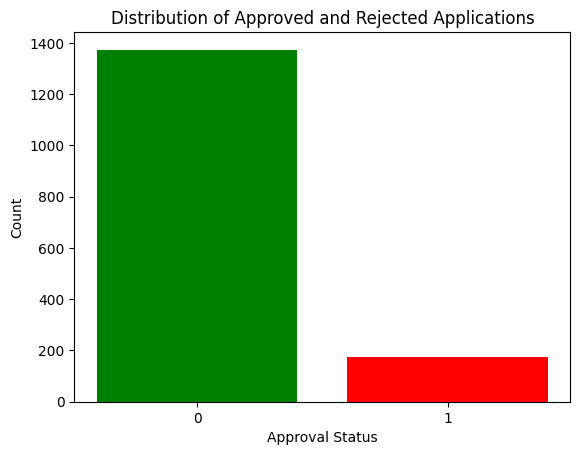

In [25]:

# Plotting the distribution of approved and rejected applications
approval_counts = df['label'].value_counts()

plt.bar(approval_counts.index, approval_counts.values, color=['green', 'red'])
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.title('Distribution of Approved and Rejected Applications')
plt.xticks(approval_counts.index, ['0', '1'])
plt.show()


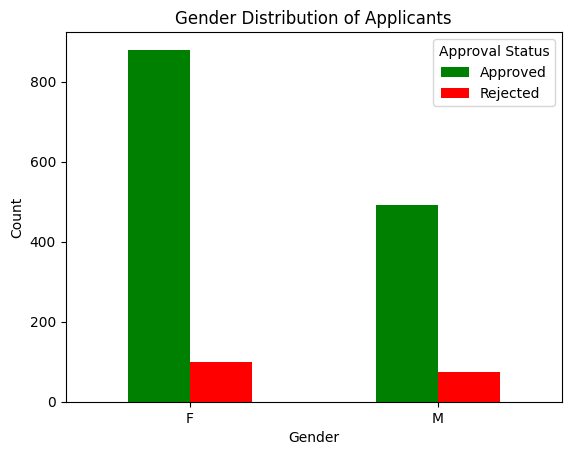

In [26]:

# Grouping the data by 'GENDER' and 'Labels' and getting the count
gender_counts = df.groupby(['GENDER', 'label']).size().unstack()

# Bar chart for gender distribution
gender_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Approval Status', labels=['Approved', 'Rejected'])
plt.show()


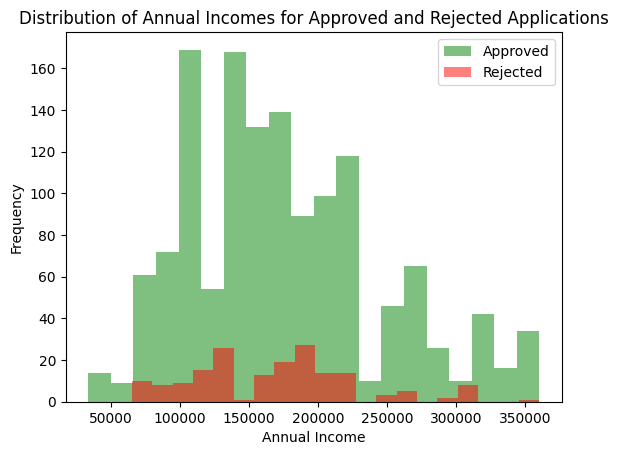

In [27]:

# Creating histograms to compare the distribution of annual incomes
plt.hist(df[df['label'] == 0]['Annual_income'], bins=20, alpha=0.5, color='green', label='Approved')
plt.hist(df[df['label'] == 1]['Annual_income'], bins=20, alpha=0.5, color='red', label='Rejected')

plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Incomes for Approved and Rejected Applications')
plt.legend()
plt.show()


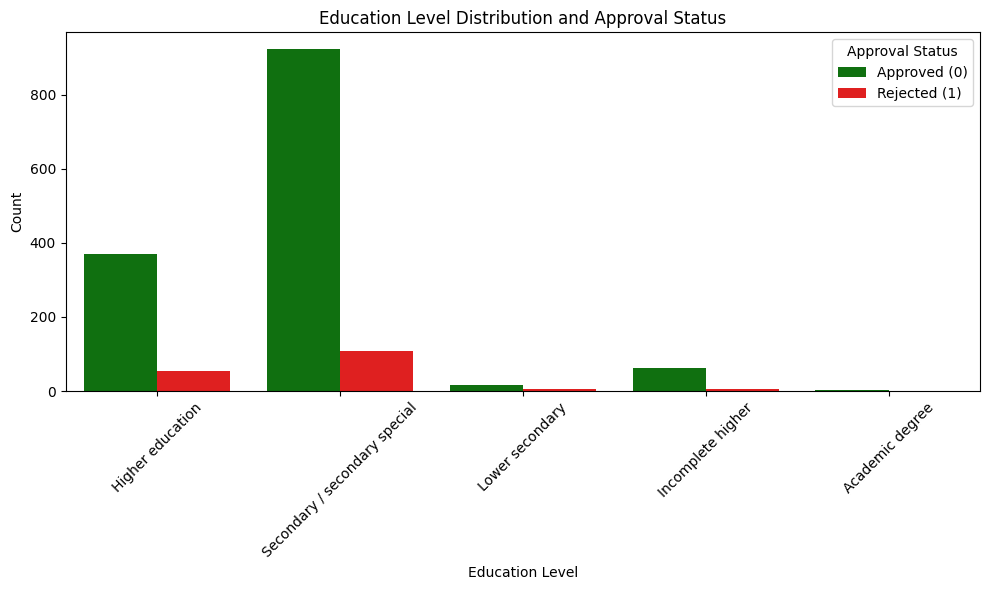

In [28]:


# Count plot to visualize education level and approval status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EDUCATION', hue='label', palette=['green', 'red'])
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution and Approval Status')
plt.xticks(rotation=45)
plt.legend(title='Approval Status', labels=['Approved (0)', 'Rejected (1)'])
plt.tight_layout()
plt.show()


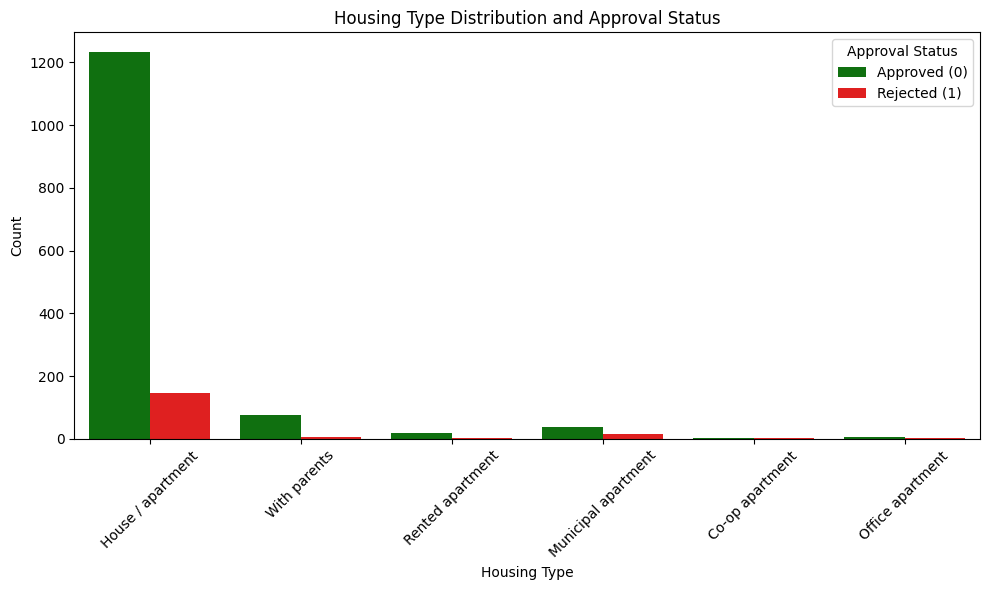

In [29]:


# Count plot to visualize housing type distribution and approval status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Housing_type', hue='label', palette=['green', 'red'])
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution and Approval Status')
plt.xticks(rotation=45)
plt.legend(title='Approval Status', labels=['Approved (0)', 'Rejected (1)'])
plt.tight_layout()
plt.show()


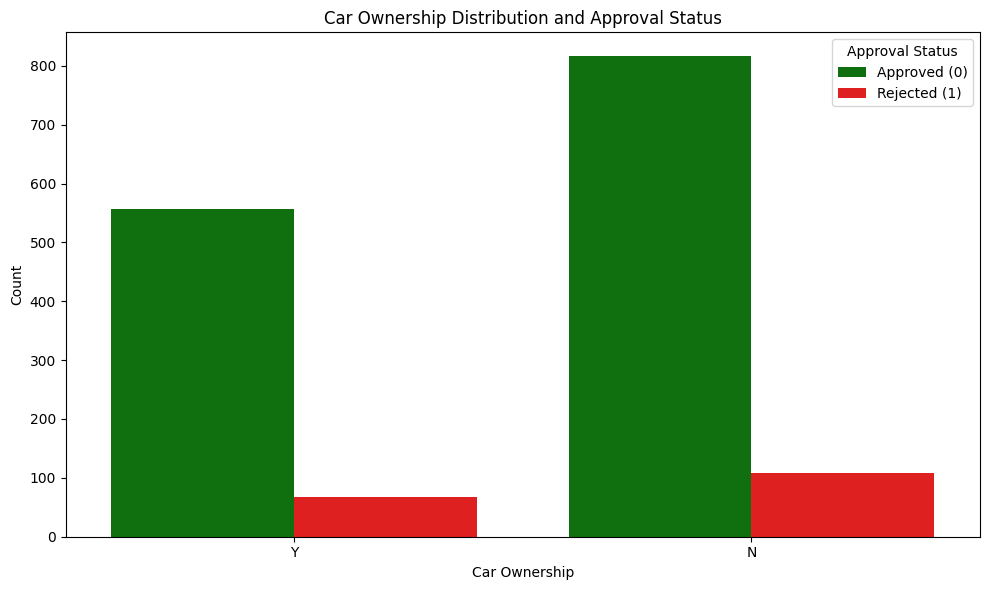

In [30]:


# Count plot to visualize car and property ownership distribution and approval status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Car_Owner', hue='label', palette=['green', 'red'])
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.title('Car Ownership Distribution and Approval Status')
plt.xticks(rotation=0)
plt.legend(title='Approval Status', labels=['Approved (0)', 'Rejected (1)'])
plt.tight_layout()
plt.show()




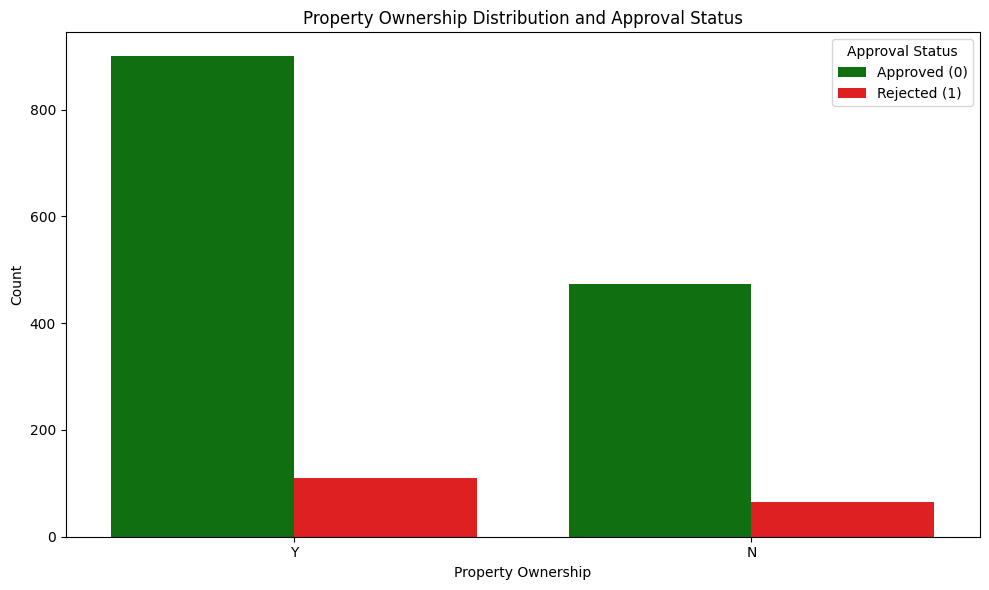

In [31]:
# Count plot to visualize property ownership distribution and approval status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Propert_Owner', hue='label', palette=['green', 'red'])
plt.xlabel('Property Ownership')
plt.ylabel('Count')
plt.title('Property Ownership Distribution and Approval Status')
plt.xticks(rotation=0)
plt.legend(title='Approval Status', labels=['Approved (0)', 'Rejected (1)'])
plt.tight_layout()
plt.show()

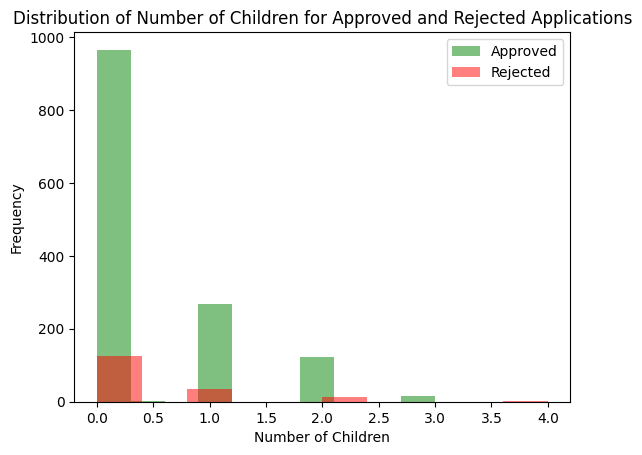

In [32]:


# Creating histograms to compare the distribution of the number of children
plt.hist(df[df['label'] == 0]['CHILDREN'], bins=10, alpha=0.5, color='green', label='Approved')
plt.hist(df[df['label'] == 1]['CHILDREN'], bins=10, alpha=0.5, color='red', label='Rejected')

plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Children for Approved and Rejected Applications')
plt.legend()
plt.show()


## **Converting categorical values to numerical**

In [33]:
# List of column names with categorical values to be encoded
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type']

# Use get_dummies() to perform one-hot encoding on the specified columns
df = pd.get_dummies(df, columns=categorical_columns)

## Performed One-hot encoding to convert categorical values to numerical

## **Dropping the unnecessary columns before feeding the data to algorithms**

In [34]:
df = df.drop('Ind_ID', axis=1)

## **Splitting the data for training and testing**

In [35]:
# Splitting the data into features (X) and the target variable (y)
X = df.drop('label', axis=1)  # Features excluding the 'label' column
y = df['label']  # Target variable 'label'

# Splitting the data into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Logistic Regression**

In [36]:
# fitting the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test))

## **Random Forest**

In [37]:
# fitting the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

## **SVM**

In [38]:

# fitting the Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

## **xgboost**

In [39]:
# fitting the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

## **Evaluating using different metrics**

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# True labels for test set
y_true = y_test

# Predicted labels for each model
y_pred_lr = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_true, y_pred_lr)
accuracy_rf = accuracy_score(y_true, y_pred_rf)
accuracy_svm = accuracy_score(y_true, y_pred_svm)
accuracy_xgb = accuracy_score(y_true, y_pred_xgb)

# Calculate precision for each model
precision_lr = precision_score(y_true, y_pred_lr)
precision_rf = precision_score(y_true, y_pred_rf)
precision_svm = precision_score(y_true, y_pred_svm)
precision_xgb = precision_score(y_true, y_pred_xgb)

# Calculate recall for each model
recall_lr = recall_score(y_true, y_pred_lr)
recall_rf = recall_score(y_true, y_pred_rf)
recall_svm = recall_score(y_true, y_pred_svm)
recall_xgb = recall_score(y_true, y_pred_xgb)

# Calculate F1-score for each model
f1_lr = f1_score(y_true, y_pred_lr)
f1_rf = f1_score(y_true, y_pred_rf)
f1_svm = f1_score(y_true, y_pred_svm)
f1_xgb = f1_score(y_true, y_pred_xgb)

# Create confusion matrices for each model
confusion_matrix_lr = confusion_matrix(y_true, y_pred_lr)
confusion_matrix_rf = confusion_matrix(y_true, y_pred_rf)
confusion_matrix_svm = confusion_matrix(y_true, y_pred_svm)
confusion_matrix_xgb = confusion_matrix(y_true, y_pred_xgb)

# Print or display the evaluation metrics for each model
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-Score: {f1_lr}")
print("Confusion Matrix:")
print(confusion_matrix_lr)
print("\n")

print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print("Confusion Matrix:")
print(confusion_matrix_rf)
print("\n")

print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")
print("Confusion Matrix:")
print(confusion_matrix_svm)
print("\n")

print("XGBoost:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-Score: {f1_xgb}")
print("Confusion Matrix:")
print(confusion_matrix_xgb)


Logistic Regression:
Accuracy: 0.9032258064516129
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Confusion Matrix:
[[280   0]
 [ 30   0]]


Random Forest:
Accuracy: 0.932258064516129
Precision: 1.0
Recall: 0.3
F1-Score: 0.4615384615384615
Confusion Matrix:
[[280   0]
 [ 21   9]]


Support Vector Machine (SVM):
Accuracy: 0.9032258064516129
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Confusion Matrix:
[[280   0]
 [ 30   0]]


XGBoost:
Accuracy: 0.9290322580645162
Precision: 0.7857142857142857
Recall: 0.36666666666666664
F1-Score: 0.5
Confusion Matrix:
[[277   3]
 [ 19  11]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In summary, Random Forest performed better because it achieved a high precision, which is crucial for minimizing false approvals and reducing the risk associated with credit card lending. While XGBoost had a higher recall, it came at the cost of lower precision, potentially leading to more false approvals.